In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [20]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.dropna(subset=['quantity'], inplace=True)

train_df['date'] = pd.to_datetime(train_df['date'], format="%d/%m/%y")
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
# train_df['day_of_week_name'] = train_df['date'].dt.day_name()
train_df['day_of_week'] = train_df['date'].dt.dayofweek
# train_df['is_weekend_name'] = train_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6]).astype(int)

train_df = train_df.astype({'quantity': int, 'pop': int, 'id': int})
train_df.drop('id', axis=1, inplace=True)

train_df['city_num'] = train_df['city'].astype('category').cat.codes
train_df['shop_num'] = train_df['shop'].astype('category').cat.codes
train_df['brand_num'] = train_df['brand'].astype('category').cat.codes
train_df['container_num'] = train_df['container'].astype('category').cat.codes
train_df['capacity_num'] = train_df['capacity'].astype('category').cat.codes

train_df['lag_1'] = train_df['quantity'].shift(1)
train_df['lag_2'] = train_df['quantity'].shift(2)

train_df['rolling_mean_3'] = train_df['quantity'].rolling(window=3).mean()
train_df['rolling_var_3'] = train_df['quantity'].rolling(window=3).var()

train_df['diff_1'] = train_df['quantity'].diff()
train_df['seasonal_diff_12'] = train_df['quantity'].diff(12)
train_df['seasonal_diff_90'] = train_df['quantity'].diff(90)

train_df['rate_of_change'] = train_df['quantity'].diff() / train_df['quantity'].shift()
train_df['cumulative_sum'] = train_df['quantity'].cumsum()

train_df['ewm_mean'] = train_df['quantity'].ewm(span=12).mean()
train_df['ewm_std'] = train_df['quantity'].ewm(span=12).std()



test_df['date'] = pd.to_datetime(test_df['date'], format="%d/%m/%y")
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6]).astype(int)

test_df = test_df.astype({'quantity': int, 'pop': int, 'id': int})
test_df.drop('id', axis=1, inplace=True)

test_df['city_num'] = test_df['city'].astype('category').cat.codes
test_df['shop_num'] = test_df['shop'].astype('category').cat.codes
test_df['brand_num'] = test_df['brand'].astype('category').cat.codes
test_df['container_num'] = test_df['container'].astype('category').cat.codes
test_df['capacity_num'] = test_df['capacity'].astype('category').cat.codes

test_df['lag_1'] = test_df['quantity'].shift(1)
test_df['lag_2'] = test_df['quantity'].shift(2)

test_df['rolling_mean_3'] = test_df['quantity'].rolling(window=3).mean()
test_df['rolling_var_3'] = test_df['quantity'].rolling(window=3).var()

test_df['diff_1'] = test_df['quantity'].diff()
test_df['seasonal_diff_12'] = test_df['quantity'].diff(12)
test_df['seasonal_diff_90'] = test_df['quantity'].diff(90)

test_df['rate_of_change'] = test_df['quantity'].diff() / test_df['quantity'].shift()
test_df['cumulative_sum'] = test_df['quantity'].cumsum()

test_df['ewm_mean'] = test_df['quantity'].ewm(span=12).mean()
test_df['ewm_std'] = test_df['quantity'].ewm(span=12).std()

train_df.head(20)

,date,city,lat,long,pop,shop,brand,container,capacity,price,...,lag_2,rolling_mean_3,rolling_var_3,diff_1,seasonal_diff_12,seasonal_diff_90,rate_of_change,cumulative_sum,ewm_mean,ewm_std
0,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,glass,500ml,0.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13280,13280.000000,NaN
1,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,plastic,1.5lt,2.86,...,NaN,NaN,NaN,-6553.0,NaN,NaN,-0.493449,20007,9730.458333,4633.670737
2,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,kinder-cola,can,330ml,0.87,...,13280.0,9951.666667,1.074351e+07,3121.0,NaN,NaN,0.463951,29855,9776.334873,3137.803186
3,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,glass,500ml,1.00,...,6727.0,12208.333333,4.855396e+07,10202.0,NaN,NaN,1.035946,49905,13019.329454,6062.800317
4,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,adult-cola,can,330ml,0.39,...,9848.0,18531.333333,6.451954e+07,5646.0,NaN,NaN,0.281596,75601,16463.535535,8090.559229
5,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,glass,500ml,1.00,...,20050.0,20262.333333,2.841607e+07,-10655.0,NaN,NaN,-0.414656,90642,16117.784561,6937.339855
6,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,orange-power,can,330ml,0.43,...,25696.0,25105.000000,9.568555e+07,19537.0,NaN,NaN,1.298916,125220,20237.117049,10325.871045
7,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,gazoza,glass,500ml,0.49,...,15041.0,31451.000000,2.277522e+08,10156.0,NaN,NaN,0.293713,169954,25349.238948,14086.476516
8,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,glass,500ml,0.70,...,34578.0,32645.000000,1.732484e+08,-26111.0,NaN,NaN,-0.583695,188577,24018.549477,12856.197603
9,2012-01-31,Athens,37.97945,23.71622,672130,shop_1,lemon-boost,plastic,1.5lt,2.21,...,44734.0,24334.000000,3.322711e+08,-8978.0,NaN,NaN,-0.482092,198222,21294.767437,12989.304678


In [6]:
X_train_simple = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_train = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                    'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_train = train_df['quantity']

X_test_simple = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_test = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                  'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test = test_df['quantity']

In [9]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [8]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.5 MB/s eta 0:00:00


In [10]:
models=[("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge()),
        ("Lasso Regression", Lasso()),
        ("Elastic-Net Regression", ElasticNet()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("Extra Trees", ExtraTreesRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("Ada Boost", AdaBoostRegressor()),
        ("XGBRegressor", XGBRegressor()),
        ("LGBMRegressor", LGBMRegressor(verbose=-1)),
        ("CatBoostRegressor", CatBoostRegressor(silent=True)),
        ("KNeighbors", KNeighborsRegressor())]

for name, model in models:
    results = cross_val_score(model, X_train_simple, y_train, cv=10, scoring='r2')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[93m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Linear Regression: 0.1308 ± 0.2695
Ridge Regression: 0.1310 ± 0.2692
Lasso Regression: 0.1308 ± 0.2694
Elastic-Net Regression: 0.0630 ± 0.2600
Decision Tree: 0.5088 ± 0.1717
Random Forest: 0.7670 ± 0.1045
Extra Trees: 0.7638 ± 0.1248
Gradient Boosting: 0.8263 ± 0.0599
Ada Boost: 0.4483 ± 0.3049
XGBRegressor: 0.8100 ± 0.1022
LGBMRegressor: 0.8418 ± 0.0564
CatBoostRegressor: 0.8782 ± 0.0504
KNeighbors: 0.4247 ± 0.0704


In [11]:
# model = CatBoostRegressor(silent=True)

# grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'depth': [4, 6, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

# grid_search_result = model.grid_search(grid, X=X_train, y=y_train, plot=True)
# print(grid_search_result['params'])

In [12]:
cb_model = CatBoostRegressor(depth=6, l2_leaf_reg=5, learning_rate=0.05, silent=True).fit(X_train, y_train)
cb_predict = cb_model.predict(X_test)
# cb_model.get_all_params()

print(f"""Тrain: {cb_model.score(X_train, y_train)}\nТest: {cb_model.score(X_test, y_test)}""")
print("")
print("r2_score: ", r2_score(y_test, cb_predict))
print("mean_absolute_error: ", mean_absolute_error(y_test, cb_predict))
print("mean_squared_error: ", mean_squared_error(y_test, cb_predict))
print("root_mean_squared_error: ", mean_squared_error(y_test, cb_predict, squared=False))
print("max_error: ", max_error(y_test, cb_predict))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, cb_predict))

Тrain: 0.9997599601157552
Тest: 0.9997599601157552

r2_score:  0.9997599601157552
mean_absolute_error:  199.97055109235052
mean_squared_error:  62802.13523528303
root_mean_squared_error:  250.60354194480777
max_error:  889.2660651914193
mean_absolute_percentage_error:  0.008994217217874008


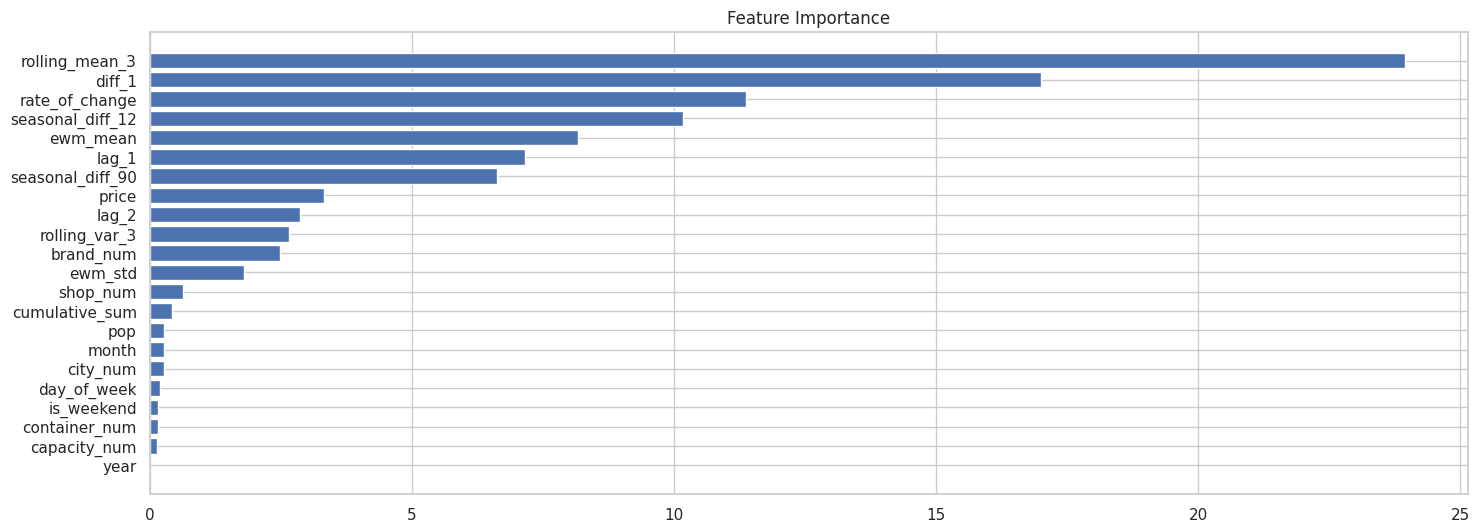

In [13]:
feature_importance = cb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(17, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

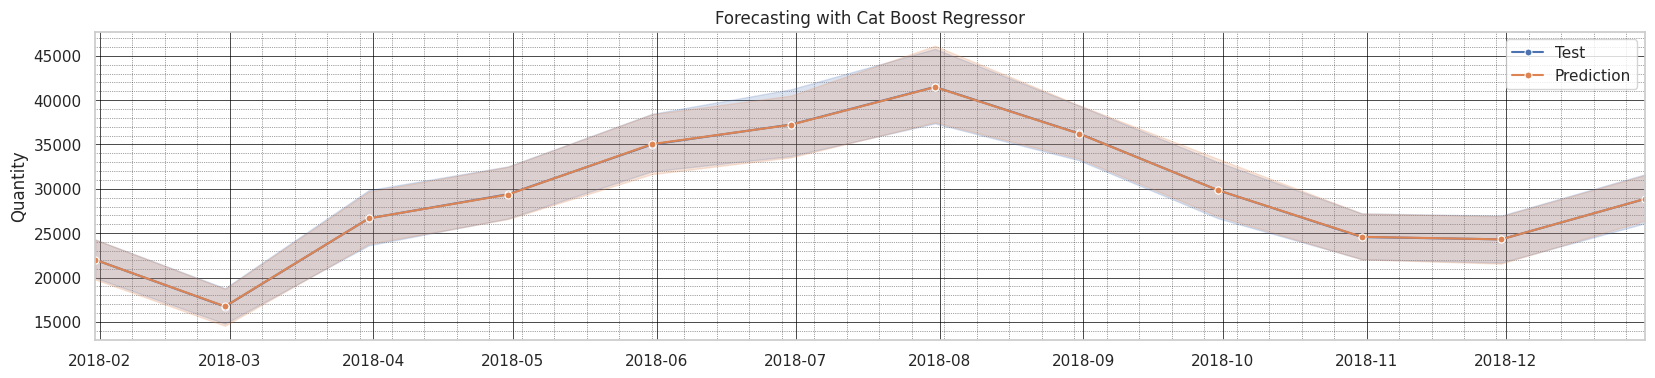

In [14]:
start_date_test = test_df['date'].min()
end_date_test = test_df['date'].max()

f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=test_df['date'], y=test_df['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=test_df['date'], y=cb_predict, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Forecasting with Cat Boost Regressor")
ax.legend();

In [15]:
city_to_plot = 'Athens'
shop_1_to_plot = 'shop_1'
shop_2_to_plot = 'shop_3'
brand_to_plot = 'gazoza'
container_to_plot = 'can'

filtered_df_shop_1_test = test_df[(test_df['city'] == city_to_plot) & (test_df['shop'] == shop_1_to_plot) & (test_df['brand'] == brand_to_plot) & (test_df['container'] == container_to_plot)]

X_test_shop_1 = filtered_df_shop_1_test[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                                         'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test_shop_1 = filtered_df_shop_1_test['quantity']

cb_predict_shop_1 = cb_model.predict(X_test_shop_1)
print("r2_score: ", r2_score(y_test_shop_1, cb_predict_shop_1))
print("mean_absolute_error: ", mean_absolute_error(y_test_shop_1, cb_predict_shop_1))
print("mean_squared_error: ", mean_squared_error(y_test_shop_1, cb_predict_shop_1))
print("root_mean_squared_error: ", mean_squared_error(y_test_shop_1, cb_predict_shop_1, squared=False))
print("max_error: ", max_error(y_test_shop_1, cb_predict_shop_1))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test_shop_1, cb_predict_shop_1))

r2_score:  0.9998171731735506
mean_absolute_error:  218.27666842522345
mean_squared_error:  63502.756711500355
root_mean_squared_error:  251.99753314566465
max_error:  423.0899881196274
mean_absolute_percentage_error:  0.008488840514926757


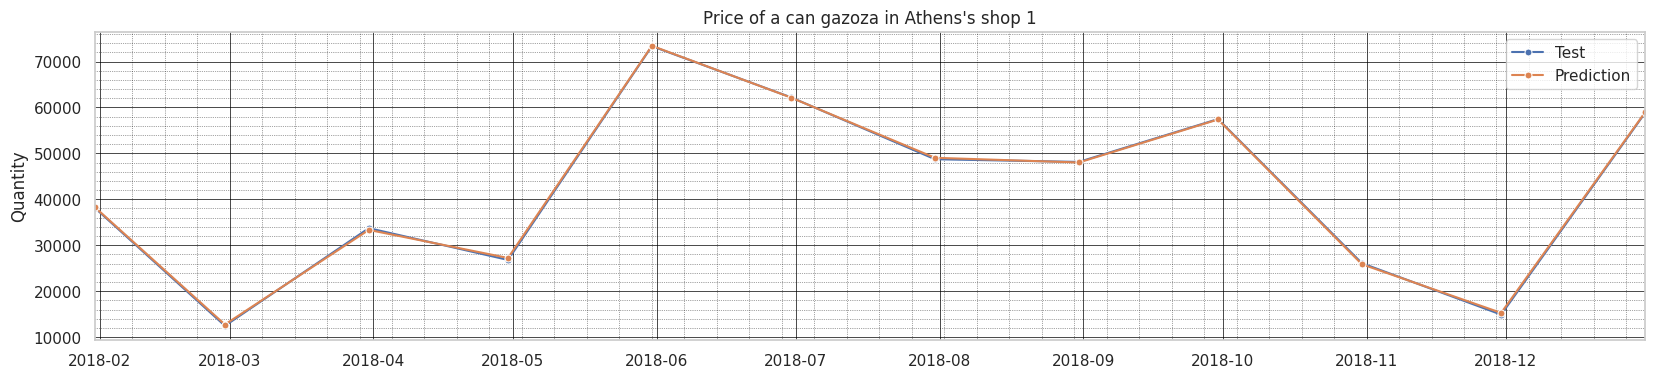

In [16]:
f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=filtered_df_shop_1_test['date'], y=filtered_df_shop_1_test['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=filtered_df_shop_1_test['date'], y=cb_predict_shop_1, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Price of a {container_to_plot} {brand_to_plot} in {city_to_plot}'s shop 1")
ax.legend();

In [17]:
filtered_df_shop_2_test = test_df[(test_df['city'] == city_to_plot) & (test_df['shop'] == shop_2_to_plot) & (test_df['brand'] == brand_to_plot) & (test_df['container'] == container_to_plot)]

X_test_shop_2 = filtered_df_shop_2_test[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                                         'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test_shop_2 = filtered_df_shop_2_test['quantity']

cb_predict_shop_2 = cb_model.predict(X_test_shop_2)
print("r2_score: ", r2_score(y_test_shop_2, cb_predict_shop_2))
print("mean_absolute_error: ", mean_absolute_error(y_test_shop_2, cb_predict_shop_2))
print("mean_squared_error: ", mean_squared_error(y_test_shop_2, cb_predict_shop_2))
print("root_mean_squared_error: ", mean_squared_error(y_test_shop_2, cb_predict_shop_2, squared=False))
print("max_error: ", max_error(y_test_shop_2, cb_predict_shop_2))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test_shop_2, cb_predict_shop_2))

r2_score:  0.9998010456556841
mean_absolute_error:  167.50957898702367
mean_squared_error:  39612.807571167476
root_mean_squared_error:  199.02966505314598
max_error:  333.85833174945583
mean_absolute_percentage_error:  0.006350254350909929


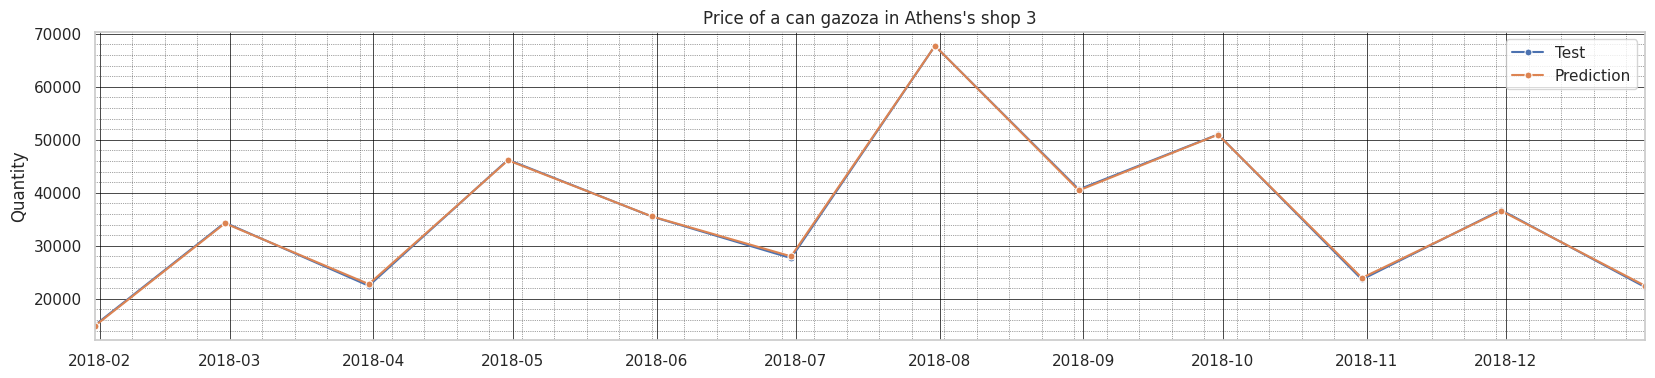

In [18]:
f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=filtered_df_shop_2_test['date'], y=filtered_df_shop_2_test['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=filtered_df_shop_2_test['date'], y=cb_predict_shop_2, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Price of a {container_to_plot} {brand_to_plot} in {city_to_plot}'s shop 3")
ax.legend();

In [21]:
import pandas as pd
from sklearn.model_selection import KFold

def kfold_cv(k):
    """
    Initialize KFold cross-validator.

    Parameters:
        k (int): Number of folds

    Returns:
        KFold: KFold object
    """
    return KFold(n_splits=k, shuffle=True, random_state=42)

def split(data, k=5):
    """
    Perform K-fold cross-validation split on the dataset.

    Parameters:
        data (pandas.DataFrame): The training dataset
        k (int): Number of folds

    Yields:
        train (pandas.DataFrame): Training set indices
        validate (pandas.DataFrame): Validation set indices
    """
    kf = kfold_cv(k)
    for train_idx, val_idx in kf.split(data):
        train = data.iloc[train_idx]
        validate = data.iloc[val_idx]
        yield train, validate

if __name__ == "__main__":
    # Read training dataset from train.csv
    train_data = pd.read_csv('train.csv')

    # Read test dataset from test.csv
    test_data = pd.read_csv('test.csv')

    # Split the training data using K-fold cross-validation
    for i, (train, validate) in enumerate(split(train_data, k=3)):
        print(f"Fold {i+1}:")
        print("Training set:")
        print(train)
        print("Validation set:")
        print(validate)
        print("-----------------")

    # Display the test data
    print("Test Data:")
    print(test_data)


Fold 1:
Training set:
       id      date    city       lat      long       pop    shop  \
1     1.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
2     2.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
3     3.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
4     4.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
5     5.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
...   ...       ...     ...       ...       ...       ...     ...   
7552  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7555  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7557  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7558  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7559  NaN       NaN     NaN       NaN       NaN       NaN     NaN   

             brand container capacity  price  quantity  
1      kinder-cola   plastic    1.5lt   2.86    6727.0  
2      kinder-cola       can    330

In [23]:
import pandas as pd
from sklearn.model_selection import KFold

def kfold_cv(k):
    """
    Initialize KFold cross-validator.

    Parameters:
        k (int): Number of folds

    Returns:
        KFold: KFold object
    """
    return KFold(n_splits=k, shuffle=True, random_state=42)

def split(data, date_column=None, k=5):
    """
    Perform K-fold cross-validation split on the dataset.

    Parameters:
        data (pandas.DataFrame): The training dataset
        date_column (str): Column name for the datetime column. If None, use index.
        k (int): Number of folds

    Yields:
        train (pandas.DataFrame): Training set indices
        validate (pandas.DataFrame): Validation set indices
    """
    if date_column is not None:
        data.sort_values(by=date_column, inplace=True)

    kf = kfold_cv(k)
    for train_idx, val_idx in kf.split(data):
        train = data.iloc[train_idx]
        validate = data.iloc[val_idx]
        yield train, validate

if __name__ == "__main__":
    # Read training dataset from train.csv
    train_data = pd.read_csv('train.csv')

    # Perform K-fold cross-validation on the training data
    for i, (train, validate) in enumerate(split(train_data, k=3)):
        print(f"Fold {i+1}:")
        print("Training set:")
        print(train)
        print("Validation set:")
        print(validate)
        print("-----------------")


Fold 1:
Training set:
       id      date    city       lat      long       pop    shop  \
1     1.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
2     2.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
3     3.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
4     4.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
5     5.0  31/01/12  Athens  37.97945  23.71622  672130.0  shop_1   
...   ...       ...     ...       ...       ...       ...     ...   
7552  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7555  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7557  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7558  NaN       NaN     NaN       NaN       NaN       NaN     NaN   
7559  NaN       NaN     NaN       NaN       NaN       NaN     NaN   

             brand container capacity  price  quantity  
1      kinder-cola   plastic    1.5lt   2.86    6727.0  
2      kinder-cola       can    330